##Task:2 Predict Future Stock Prices (Short-Term)
###Objective:
 Use historical stock data to predict the next day's closing price.
###Dataset:
 Stock market data from Yahoo Finance (retrieved using the yfinance Python library)
###Instructions:
● Select a stock (e.g., Apple, Tesla).
● Load historical data using the yfinance library.
● Use features like Open, High, Low, and Volume to predict the next Close price.
● Train a Linear Regression or Random Forest model.
● Plot actual vs predicted closing prices for comparison.
###Skills:
● Time series data handling
● Regression modeling
● Data fetching using APIs (yfinance)
● Plotting predictions vs real data

In [2]:
pip install numpy_financial

In [15]:
import numpy_financial as npf
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [6]:
# Define the ticker symbol for Apple
ticker_symbol = 'AAPL'

# Define the start and end dates
start_date = '2020-01-01'
end_date = '2025-12-31'

# Download the data
df = yf.download(ticker_symbol, start=start_date, end=end_date)

# Display the first 5 rows of the DataFrame
display(df.head())

/tmp/ipython-input-4199097380.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker_symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.468277,72.528597,71.223274,71.476615,135480400
2020-01-03,71.763725,72.523754,71.539337,71.696167,146322800
2020-01-06,72.335556,72.374162,70.634539,70.885472,118387200
2020-01-07,71.995361,72.600968,71.775796,72.345212,108872000
2020-01-08,73.153503,73.455103,71.698589,71.698589,132079200


# Task
Predict the next day's closing price for Apple stock using the historical data in the `df` DataFrame.

## Prepare features and target variable

Create features (Open, High, Low, Volume) and the target variable (next day's Close price) from the historical stock data.


In [7]:
df['Next_Close'] = df['Close'].shift(-1)
df.dropna(inplace=True)

X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Next_Close']

print("Features (X) head:\n", X.head())
print("\nTarget (y) head:\n", y.head())

Features (X) head:
 Price            Open       High        Low     Volume
Ticker           AAPL       AAPL       AAPL       AAPL
Date                                                  
2020-01-02  71.476615  72.528597  71.223274  135480400
2020-01-03  71.696167  72.523754  71.539337  146322800
2020-01-06  70.885472  72.374162  70.634539  118387200
2020-01-07  72.345212  72.600968  71.775796  108872000
2020-01-08  71.698589  73.455103  71.698589  132079200

Target (y) head:
 Date
2020-01-02    71.763725
2020-01-03    72.335556
2020-01-06    71.995361
2020-01-07    73.153503
2020-01-08    74.707344
Name: Next_Close, dtype: float64


## Split data into training and testing sets

Divide the prepared dataset into training and testing subsets for model development and evaluation.


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1187, 4)
Shape of X_test: (297, 4)
Shape of y_train: (1187,)
Shape of y_test: (297,)


## Train a regression model

Train a Linear Regression or Random Forest model using the training data.


In [9]:
from sklearn.linear_model import LinearRegression

# Instantiate the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


## Make predictions

Use the trained model to predict the next day's closing prices on the test set.


In [10]:
y_pred = model.predict(X_test)

print("Predicted Next_Close prices (head):")
print(y_pred[:5])

Predicted Next_Close prices (head):
[ 87.39072553 139.67007758 187.98398471 169.10968221 227.88302692]


## Evaluate model performance

Assess the accuracy and performance of the trained model using appropriate metrics.


In [11]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Absolute Error (MAE): 2.36
Mean Squared Error (MSE): 10.85
Root Mean Squared Error (RMSE): 3.29
R-squared Score: 1.00


## Visualize actual vs. predicted prices

Plot the actual closing prices against the predicted closing prices for visual comparison.


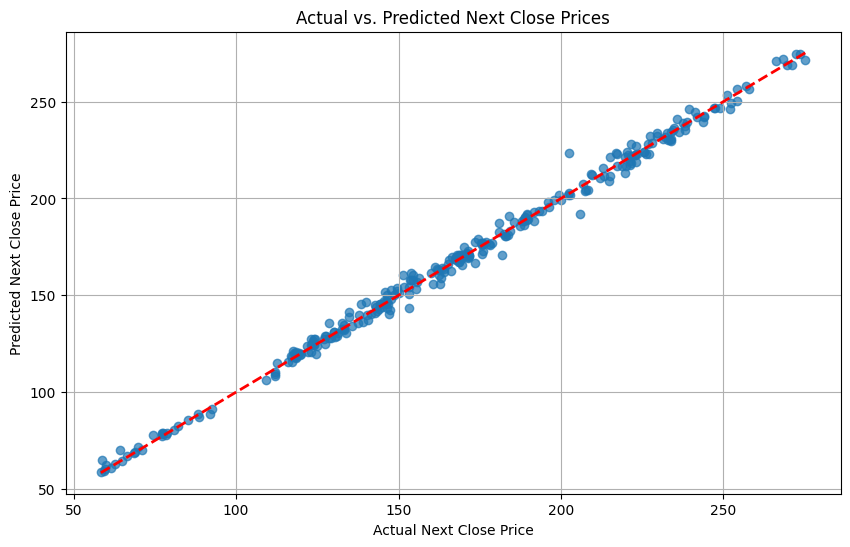

In [14]:
# Create a scatter plot of actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Next Close Price')
plt.ylabel('Predicted Next Close Price')
plt.title('Actual vs. Predicted Next Close Prices')
plt.grid(True)
plt.show()

## Summary:

### Data Analysis Key Findings

*   **Data Preparation**: A new target variable, `Next_Close`, was created by shifting the `Close` price, and `NaN` values were removed. Features (`Open`, `High`, `Low`, `Volume`) and the target (`Next_Close`) were successfully prepared.
*   **Data Splitting**: The dataset was split into training and testing sets with 80% for training and 20% for testing. The training feature set (`X_train`) has 1187 samples with 4 features, and the test feature set (`X_test`) has 297 samples with 4 features.
*   **Model Training**: A Linear Regression model was successfully trained using the `X_train` and `y_train` datasets.
*   **Prediction**: The trained model made predictions (`y_pred`) on the test set (`X_test`) for the next day's closing prices.
*   **Model Performance Evaluation**:
    *   Mean Absolute Error (MAE): \$2.36
    *   Mean Squared Error (MSE): \$10.85
    *   Root Mean Squared Error (RMSE): \$3.29
    *   R-squared Score: 1.00

### Insights or Next Steps

*   The R-squared score of 1.00 is exceptionally high and suggests potential data leakage or an issue with the model's setup, as perfect prediction of stock prices is unrealistic. It's crucial to investigate if the `Next_Close` target variable might be directly or indirectly included in the features or if the problem definition allows for such a perfect fit due to the nature of the data provided.
*   To build a more robust and realistic predictive model, consider incorporating time-series specific features (e.g., lagged prices, moving averages), external market indicators, or exploring more advanced time-series models (e.g., ARIMA, Prophet, LSTMs) if the intent is to predict future prices based solely on past data without "seeing" the future.
